# Module 6 Activity Complete

By Jahnavi Chintakindi

## Data Models and Algorithms

Data modeling is the process of creating a visual representation of either a whole information system or parts of it to communicate connections between data points and structures. The goal is to illustrate the types of data used and stored within the system, the relationships among these data types, the ways the data can be grouped and organized and its formats and attributes.

https://www.ibm.com/topics/data-modeling

* Regression
* Classification
* Decision Trees

Algorithms are run on data to create a model

## Train Test Split

A goal of supervised learning is to build a model that performs well on new data. If you have new data, it’s a good idea to see how your model performs on it. The problem is that you may not have new data, but you can simulate this experience with a procedure like train test split. Train test split is a model validation process that allows you to simulate how your model would perform with new data.

https://builtin.com/data-science/train-test-split

## Supervised Learning

Supervised machine learning is a type of machine learning that learns the relationship between input and output. The inputs are known as features or ‘X variables’  and output is generally referred to as the target or ‘y variable’.

https://www.datacamp.com/blog/supervised-machine-learning

## Signal in the Noise / Patterns in Chaos

The signal is the meaningful information that you’re actually trying to detect. The noise is the random, unwanted variation or fluctuation that interferes with the signal.

https://conceptually.org/concepts/signal-and-noise

Plotly Noise Notebook

## Visualizing Patterns

Ploty Advertising Notebook

## Linear Regression

* Linear Regression Notebook
* Plotly Residuals Notebook

In [ ]:
# get the data and print shape, info, and head
import pandas as pd

url = 'https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/Advertising.csv'

# usecols=['TV', 'radio', 'newspaper', 'sales']
# why not index_col=0?

advertising = pd.read_csv(url, usecols=['TV', 'radio', 'newspaper', 'sales'])
advertising.head()
print(advertising.shape)
print(advertising.info())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(

    advertising.drop('sales',axis=1),

    advertising['sales'],

    test_size=0.25,

    random_state=42

)
print(X_train.shape)
print(X_test.shape)

(150, 3)
(50, 3)


In [ ]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
print(mean_squared_error(y_test, yhat))
print(r2_score(y_test, yhat))

2.880023730094193
0.8935163320163657


## Metrics and Coefficients

* Linear Regression Metrics and Coefficients Notebook

### Least Squares

* The least squares method is a statistical procedure to find the best fit for a set of data points. The method works by minimizing the sum of the offsets or residuals of points from the plotted curve.
* https://www.investopedia.com/terms/l/least-squares-method.asp

### The Constant

* To include or not to include the CONSTANT? Most multiple regression models include a constant term, since this ensures that the model will be "unbiased"--i.e., the mean of the residuals will be exactly zero.
* You expect your dependent variable to take a nonzero value when all the otherwise included regressors are set to zero.
* Example: Suppose you want to model the wage as a function of years of secondary schooling (in years). You’d estimate an equation of the form because one can reasonably expect the wage to take, on average, a positive value even if one's secondary schooling is null. This value would show up as a constant.
* This 'y-intercept' also serves as a benchmark

Sources
* https://people.duke.edu/~rnau/Decision411_2007/regnotes.htm#:~:text=the%20LOGARITHM%20transformation-,To%20include%20or%20not%20to%20include%20the%20CONSTANT%3F,residuals%20will%20be%20exactly%20zero.
* https://www.quora.com/In-regression-why-do-we-include-a-constant-term


In [ ]:
# create statsmodel OLS and print summary
import statsmodels.api as sm

X_train.insert(0, 'const', 1)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.02e-71
Time:                        20:24:25   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.000       2.038       3.519
TV             0.0454      0.002     27.960      0.000       0.042       0.049
radio          0.1915      0.010     19.076      0.000       0.172       0.211
newspaper      0.0026      0.007      0.356      0.722      -0.012       0.017
==============================================================================
Omnibus:                       61.891   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.420
Skew:                          -1.581   Prob(JB):                     1.50e-45
Kurtosis:                       7.799   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Other Libraries to Help Find Coefficients

In [ ]:
# using scipy
import numpy as np
import scipy.stats as stats

x=np.array([1,2,3,4,5])
y=np.array([1,3,2,3,5])

model=stats.linregress(x,y)
print(model.intercept,model.slope)
print(model)

0.39999999999999947 0.8
LinregressResult(slope=0.8, intercept=0.39999999999999947, rvalue=0.8528028654224418, pvalue=0.0662756027415242, stderr=0.282842712474619, intercept_stderr=0.9380831519646858)


In [ ]:
# use numpy linear algebra least squares
x = np.vstack([np.ones(len(x)),x]).T

print(x)
print(y)

a,b = np.linalg.lstsq(x,y, rcond=None)[0]
print(a)
print(b)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]
[1 3 2 3 5]
0.39999999999999863
0.8


## Other Types of Regression

* More Regression Notebook

## Linear Algebra

An error terms is sometimes associated with the first formula but we can detete that because it is unobservable and uncontrollable

* $y_i = \theta^TX_i$
* $h_\theta(x) = \theta_0 + \theta_1x_1 ... \theta_nx_n$

Sources

* https://www.investopedia.com/terms/e/errorterm.asp


### System of Linear Equations

Consider:
<pre>
4x1 - 2x2 +  x3 =  3
-x1 + 7x2 -  x3 = 10
 x1 +  x2 - 2x3 = -3
</pre>

Then
<pre>
 4 -2  1  | x1 |  3
-1  7 -1  | x2 | 10
 1  1  2  | x3 | -3
</pre>

#### Gaussian Elimination Method

* Multiply any row by any number
* add any row to another row
* swap any rows

#### Example

<pre>
x1 + x2 - 2x3 = -3
    3x2 - 3x3 = 7
       6.75x3 = 20.25
</pre>

Source:
* https://math.libretexts.org/Bookshelves/Linear_Algebra/Matrix_Algebra_with_Computational_Applications_%28Colbry%29/07%3A_04_Pre-Class_Assignment_-_Python_Linear_Algebra_Packages/7.1%3A_The_Syntax_for_Systems_of_Linear_Equations
* https://medium.com/datadenys/solving-systems-of-linear-equations-using-matrices-and-python-5e203a9ea146

### Vectors, Matrices, and Scalars

#### Vectors

* https://www.mathsisfun.com/algebra/scalar-vector-matrix.html (scroll down to see image)
* vector has magnitude $\sqrt{x^2 + y^2}$ and direction $\angle 45^{\circ}$
* vector = ($x_1$, $x_2$) = $r \angle \theta$
* Note: r can be thought of as $\beta$ and $\angle\theta$ as $\alpha$ in $y=\alpha X + \beta$
* $\hat{i} = (1, 0)$ unit vector (1 step)
* $\hat{j} = (0, 1)$ unit vector (1 step)
* $\vec{v} = x_1\hat{i} + x_2\hat{j}$; $v$ is also represented as bold
* vector addition is head to tail or elementwise i.e., $\sum({x_{1i} + x_{2i}})$
* dot product is elementwise or $\sum{x_{1i} x_{2i}}$
* or $||x|| * ||y|| * cos(\theta)$
* if $\vec{x_1} \vec{x_2} = 0$ (orthogonal) then $x_1$ and $x_2$ are uncorrelated
* rows (the numbers) in a dataframe (each row can be thought of as a sample) are examples of vectors

#### Vector Equation

* Vector equations ares used to represent the equation of a line or a plane with the help of the variables x, y, z.
* https://www.cuemath.com/algebra/vector-equation/
* $r = a + t\vec{AB}$
* https://www.w3schools.blog/cartesian-equation-and-vector-equation-of-a-line


#### Matrix or Matrices

* A dataframe (numerical) can be considered a matrix (rows by cols matrix is convention used in this class)
* Matrix representation of graph: rows = [a, b, c]; cols = [a, b, c]
* [a, a] = 1 (diagonal of 1s with b,b, c,c ...)
* And, for example, all off diagonals such as [a, b] = 0 etc
* Graph matrix
* Covariance matrix
* Probability matrix
* Vector matrix: by convention are represented by column vectors

In [ ]:
import pandas as pd

data = {'a': [1, 0, 0], 'b': [0, 1, 0], 'c': [0, 0, 1]}
pd.DataFrame(data, index=['a', 'b', 'c'])

,a,b,c
a,1,0,0
b,0,1,0
c,0,0,1


#### Matrix Multiplication

* To multiply an m×n matrix by an n×p matrix, the ns must be the same,
and the result is an m×p matrix
* Instead of an element-wise product, matrix multiplication is more like a generalization of the dot product. Specifically, you we have $C = AB$, then $c_{ij}$ is the dot product between the ith row of A and the jth row of B

Sources:
* https://towardsdatascience.com/a-complete-beginners-guide-to-matrix-multiplication-for-data-science-with-python-numpy-9274ecfc1dc6
* https://mathinsight.org/matrix_vector_multiplication
* https://timeseriesreasoning.com/contents/deep-dive-into-variance-covariance-matrices/
* Deep Learning Courses by the Lazy Programmer

#### Dot Product

* The numpy dot() function returns the dot product of two arrays. The result is the same as the matmul() function for one-dimensional and two-dimensional arrays
* dot product is the sum of two same size matrices, $\sum{x_{1i} x_{2i}}$ vs. element-wise which returns a similar matrix
* Another approach: $||x|| * ||y|| * cos(\theta)$ (magnitude and direction or angle between vectors)

Source:

* https://www.digitalocean.com/community/tutorials/numpy-matrix-multiplication#:~:text=The%20numpy%20dot()%20function,dimensional%20and%20two%2Ddimensional%20arrays.

#### Identity Matrix

* In linear algebra, the identity matrix of size n is the n x n square matrix with ones on the main diagonal and zeros off diagonal. It has unique properties, for example when the identity matrix represents a geometric transformation, the object remains unchanged by the transformation. In other contexts, it is analogous to multiplying by the number 1.
* A square matrix * the inverse of itself equals the identity matrix

Source:
* https://en.wikipedia.org/wiki/Identity_matrix

#### Matrix Inverse

* Gaussian Elimination Method can be used to get the inverse of a matrix
* Matrix inverse of $X$ is $X^{-1}$
* $X^{-1}X = XX^{-1} = I$
* Inverse Example: $8x = 6$ is like saying $x = 6/8 = 6*8^{-1}$
* $1/4 * 4 = 4^{-1} * 4 = 1$
* Negative exponents serve as roots e.g. since $4^3 = 64$, then $64^{-3} = \sqrt[3]{64} = 4$

#### Matrix Transform

* Transforms rows to columns and vice versa
* A row vector gets transformed to a column vector
* Notation: matrix.T
* Serves the (m, n) * (n, p) requirement

In [ ]:
# matmul
import numpy as np

x = np.array([1, 2, 3, 4, 5])
print(x)
y = np.array([[1], [3], [2], [3], [5]])
print(y)
print()
print('matrix(m, n) * matrix(n, p)')
print(np.matmul(x, y))

[1 2 3 4 5]
[[1]
 [3]
 [2]
 [3]
 [5]]

matrix(m, n) * matrix(n, p)
[50]


In [ ]:
import numpy as np
import pandas as pd

def xy(r):
    return r.x * r.y

x = np.array([1, 2, 3, 4, 5])
print(x)
y = np.array([1, 3, 2, 3, 5])
print(y)
m_table = pd.DataFrame({'x': x, 'y': y})
print('table of sums')
N = len(x)

m_table['x^2'] = m_table['x'].apply(lambda x: x**2)
m_table['xy'] = m_table.apply(xy, axis=1)
print(m_table.to_string(index=False))
sums = list(m_table.sum())
print('sums:', sums)
print()

x = np.vstack([np.ones(len(x)).astype(int), x])
print('x')
print(x)

print('x.T')
print(x.T)
print()

print('y')
print(y)

# For a 1-D array, this returns an unchanged view of the original array, as a transposed vector is simply the same vector.
print('y.T')
print('no transform for single column: ', y.T)
print('reshape is used (-1, 1) row to col; (1, -1) col to row')
yreshape = y.reshape(-1, 1)
print(yreshape)
yreshape = yreshape.reshape(1, -1)
print(yreshape)
print()

print('matmul(x, x.T)')
print(np.matmul(x, x.T))
print('inverse of matmul(x, x.T)')
print(np.matrix(np.matmul(x, x.T)).I)
print('identity matrix')
print(np.matmul(np.matmul(x, x.T), np.matrix(np.matmul(x, x.T)).I).astype('int'))
print()

print('matmul(x, y.T)')
print(np.matmul(x, y.T))
print()

# coeffs = np.matmul(np.linalg.inv(np.matmul(x, x.T)), np.matmul(x, y.T))
coeffs = np.matmul(np.matrix(np.matmul(x, x.T)).I, np.matmul(x, y))
print('coeffs: ', coeffs)
print('np.matmul(np.linalg.inv(np.matmul(x, x.T)), np.matmul(x, y.T))')

[1 2 3 4 5]
[1 3 2 3 5]
table of sums
 x  y  x^2  xy
 1  1    1   1
 2  3    4   6
 3  2    9   6
 4  3   16  12
 5  5   25  25
sums: [15, 14, 55, 50]

x
[[1 1 1 1 1]
 [1 2 3 4 5]]
x.T
[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]

y
[1 3 2 3 5]
y.T
no transform for single column:  [1 3 2 3 5]
reshape is used (-1, 1) row to col; (1, -1) col to row
[[1]
 [3]
 [2]
 [3]
 [5]]
[[1 3 2 3 5]]

matmul(x, x.T)
[[ 5 15]
 [15 55]]
inverse of matmul(x, x.T)
[[ 1.1 -0.3]
 [-0.3  0.1]]
identity matrix
[[1 0]
 [0 1]]

matmul(x, y.T)
[14 50]

coeffs:  [[0.4 0.8]]
np.matmul(np.linalg.inv(np.matmul(x, x.T)), np.matmul(x, y.T))


#### Note

* Consider $y = \alpha X + \beta$ where $\beta = constant$ and inserted into $X$ and $\alpha$ is renamed to $\theta$
* So, $\theta X = y$
* $\theta = y X^{-1}$ or $\theta = X^{-1} y$
* np.matmul(np.linalg.inv(np.matmul(x, x.T)), np.matmul(x, y.T))

and so we have
* np.matmul(x, X.T)^-1 * np.matmul(x, y.T)

#### Another Example

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])
print('x: ', x)
print('y: ', y)

x:  [1 2 3 4 5]
y:  [1 3 2 3 5]


In [ ]:
x = x.reshape(-1, 1)
x

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
X = np.append(arr = np.ones((5, 1)).astype(int), values = x, axis = 1)
print(X)
print(y)
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))

[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]
[1 3 2 3 5]
weights =  [0.4 0.8]


### The DataFrame as a Matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

advertising = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1),
    advertising['sales'],
    test_size=0.25,
    random_state=42)

X_train.insert(0, 'const', 1)
X = X_train
y = y_train

model = sm.OLS(y, X).fit()
print('StatsModel')
print(model.params)
print()
print('Numpy Linear Algebra')
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))
np.matmul(np.linalg.inv(np.matmul(X.values.T, X.values)), np.matmul(X.values.T, y))

StatsModel
const        2.778303
TV           0.045434
radio        0.191457
newspaper    0.002568
dtype: float64

Numpy Linear Algebra
weights =  [2.77830346e+00 4.54335586e-02 1.91456536e-01 2.56809082e-03]


array([2.77830346e+00, 4.54335586e-02, 1.91456536e-01, 2.56809082e-03])

## In-Class Activity

**Advertising Dataset**

Jahnavi Chintakindi

### Overview

This project will be analyzing and modeling the advertising dataset to see how sales are influenced by TV, radio, and newspaper advertising expenditures and will suggest methods to cut costs and boost sales.

In [ ]:
# create dataframe from simulated dataset and output shape, info, and head
import pandas as pd
from sklearn.datasets import make_regression

rows = 300
cols = 3

X, y = make_regression(n_samples=rows, n_features=cols)
data = {'x1': X[:, 0], 'x2': X[:, 1], 'x3': X[:, 2], 'y': y}

df=pd.DataFrame(data)

print(df.shape)
print(df.info())
df.head()


(300, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   y       300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB
None


,x1,x2,x3,y
0,-1.220086,2.454522,-0.123986,102.049323
1,-0.047009,0.644023,0.483331,89.573700
2,-1.043328,-0.840057,0.796687,-110.190940
3,-1.751278,-0.255212,0.593534,-136.229273
4,-0.151575,0.826325,2.002525,209.277246


In [ ]:
# train test split and print X_train shape and X_test shape

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.drop('y',axis=1),
    df['y'],
    test_size=0.25,
    random_state=42

)

print(X_train.shape)
print(X_test.shape)

(225, 3)
(75, 3)


In [ ]:
# describe X_train

X_train.describe()

,x1,x2,x3
count,225.000000,225.000000,225.000000
mean,0.118957,0.076117,0.064648
std,1.032471,1.012062,1.018173
min,-2.645462,-2.291560,-2.861763
25%,-0.499838,-0.659794,-0.601368
50%,0.078356,0.106106,0.139742
75%,0.805717,0.842368,0.769745
max,3.552758,2.454522,2.727243


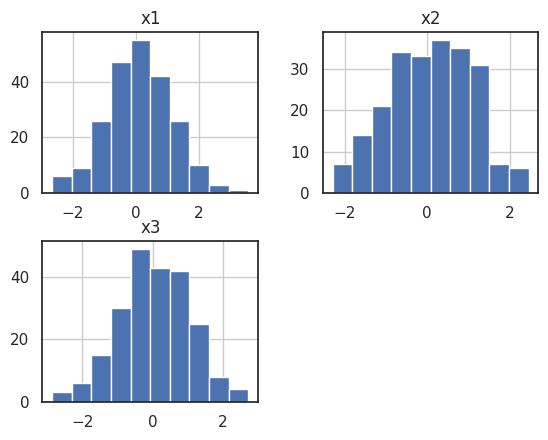

In [ ]:
# show X_train histograms

X_train.hist();

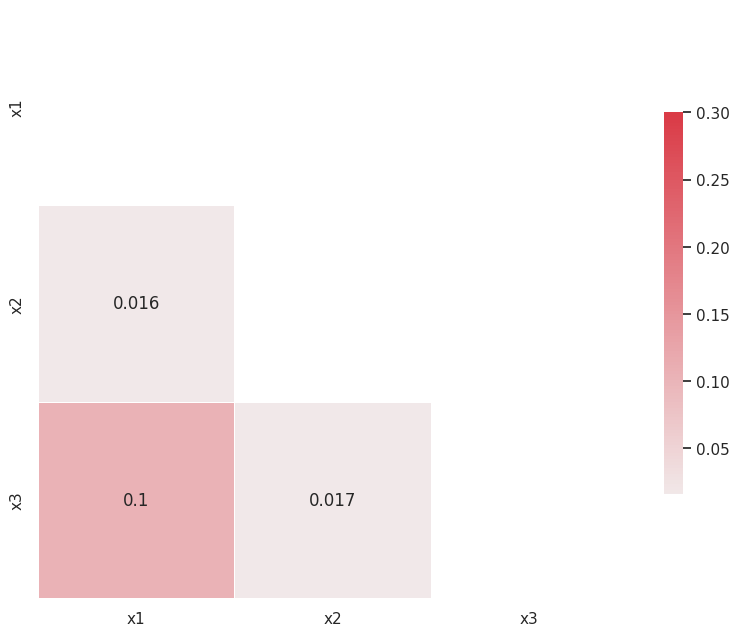

In [ ]:
# show correlation heatmap for X_train

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

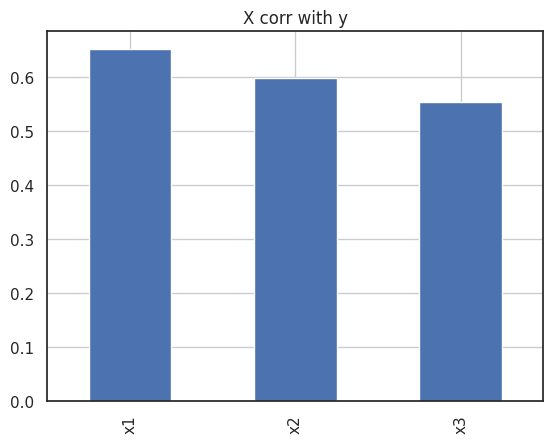

In [ ]:
# show X_train corrwith y_train

X_train.corrwith(y_train).plot.bar(title='X corr with y', rot=90, grid=True);


In [ ]:
# build a linear regression model using Sklearn Linear Regression, make predictions with X_test and ouput the coefficients, intercept, mse, and r-squared

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model=LinearRegression()
model.fit(X_train,y_train)

yhat=model.predict(X_test)
print(model.intercept_,model.coef_)
print('MSE :', mean_squared_error(y_test,yhat))
print('r-squared :',r2_score(y_test,yhat))

-1.4210854715202004e-14 [89.81804283 89.96956748 74.18004963]
MSE : 1.1354069914119343e-26
r-squared : 1.0


In [ ]:
# build a linear regression model using statsmodel and output the summary
import statsmodels.api as sm

X_train.insert(0,'const',1)
model=sm.OLS(y_train,X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.378e+33
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:23:29   Log-Likelihood:                 6706.1
No. Observations:                 225   AIC:                        -1.340e+04
Df Residuals:                     221   BIC:                        -1.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.271e-14   1.87e-15     -6.791      0.000   -1.64e-14   -9.02e-15
x1            89.8180   1.81e-15   4.97e+16      0.000      89.818      89.818
x2            89.9696   1.83e-15   4.91e+16      0.000      89.970      89.970
x3            74.1800   1.83e-15   4.05e+16      0.000      74.180      74.180
==============================================================================
Omnibus:                        1.611   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.365
Skew:                          -0.185   Prob(JB):                        0.505
Kurtosis:                       3.096   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

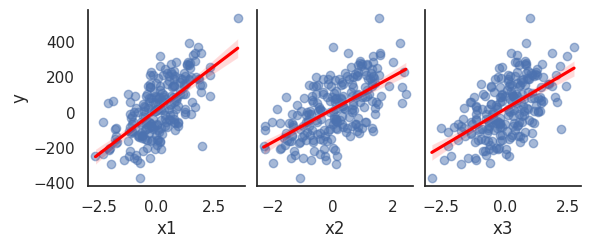

In [ ]:
# create sns pairplot, kind=reg, with X_train and y_train
import pandas as pd
import seaborn as sns

sns.pairplot(data=pd.concat([X_train,y_train],axis=1),
             x_vars=['x1','x2','x3'],y_vars='y',
             kind='reg',
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'},
                       'scatter_kws':{'alpha':0.5}
             }
             );

### Reflection

Reflect on what you did and type out some of your thoughts. What would you do to cut costs and boost sales?


As shown above, for this project analyzed and modelled the advertising dataset to see how sales is influenced by TV, radio, and newspaper advertising expenditures and provide suggestive methods to cut costs and boost sales.
